In [555]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split

In [556]:
data = pd.read_csv('../python/csv_files/salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


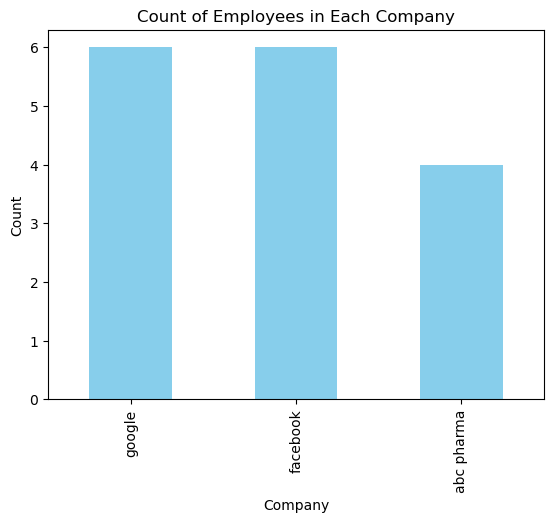

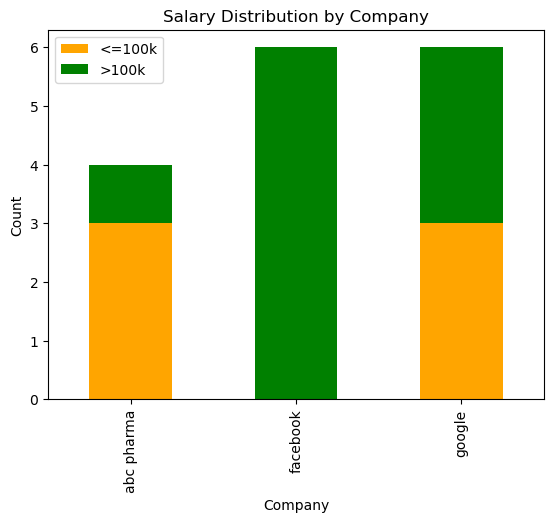

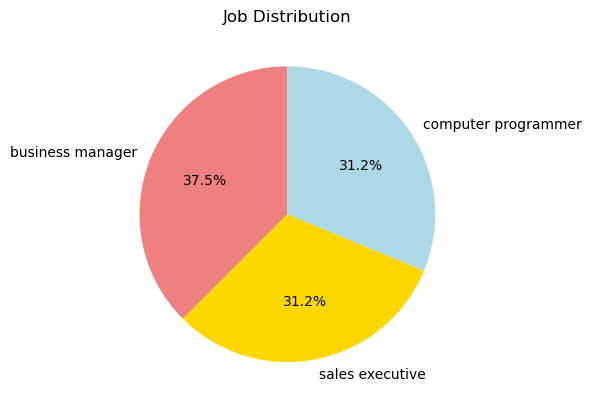

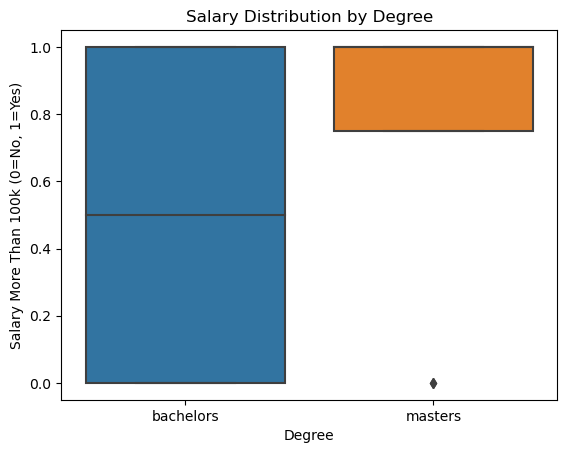

In [557]:
import matplotlib.pyplot as plt

# 1. Bar plot: Count of employees in each company
data['company'].value_counts().plot(kind='bar', title='Count of Employees in Each Company', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

# 2. Stacked bar plot: Salary distribution by company
pd.crosstab(data['company'], data['salary_more_then_100k']).plot(kind='bar', stacked=True, title='Salary Distribution by Company', color=['orange', 'green'])
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend(['<=100k', '>100k'])
plt.show()

# 3. Pie chart: Job distribution
data['job'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Job Distribution', startangle=90, colors=['lightcoral', 'gold', 'lightblue'])
plt.ylabel('')
plt.show()

# 4. Box plot: Salary distribution by degree
sns.boxplot(x='degree', y='salary_more_then_100k', data=data)
plt.title('Salary Distribution by Degree')
plt.xlabel('Degree')
plt.ylabel('Salary More Than 100k (0=No, 1=Yes)')
plt.show()


In [558]:
inputs = data.drop('salary_more_then_100k', axis=1)
target = data['salary_more_then_100k']

In [559]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

## Label Encoding

In [560]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [561]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [562]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis=1)
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [563]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [564]:
model.score(inputs_n, target)

1.0

In [565]:
model.predict([[2, 1, 1]])

/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Exercise
### Predict titanic survival

In [566]:
data = pd.read_csv('../python/csv_files/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [567]:
data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [568]:
data['Name'] = data['Name'].str.extract(r'([A-Za-z]+)\.')
data['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [569]:
data['Ticket'] = data['Ticket'].str.replace(r'\d+', '', regex=True)
data['Ticket'] = data['Ticket'].str.strip()
data['Ticket'] = data['Ticket'].str.strip('.')
data['Ticket']

0          A/
1          PC
2      STON/O
3            
4            
        ...  
886          
887          
888      W./C
889          
890          
Name: Ticket, Length: 891, dtype: object

In [570]:
ticket_values = data['Ticket'].unique()
data['Ticket'].unique()

array(['A/', 'PC', 'STON/O', '', 'PP', 'C.A', 'A./', 'SC/Paris', 'S.C./A',
       'CA', 'S.P', 'S.O.C', 'SO/C', 'W./C', 'SOTON/OQ', 'W.E.P',
       'STON/O ', 'A', 'C', 'SOTON/O.Q', 'SC/PARIS', 'S.O.P', 'Fa',
       'LINE', 'F.C.C', 'W/C', 'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH',
       'A/S', 'SC/AH Basle', 'WE/P', 'S.W./PP', 'S.O./P.P', 'F.C',
       'SOTON/O', 'S.C./PARIS', 'C.A./SOTON'], dtype=object)

In [571]:
le_sex = LabelEncoder()
data['sex_n'] = le_sex.fit_transform(data['Sex'])
data.drop('Sex', axis=1, inplace=True)

data['embarked_n'] = le_sex.fit_transform(data['Embarked'])
data.drop('Embarked', axis=1, inplace=True)

data['ticket_n'] = le_sex.fit_transform(data['Ticket'])
data.drop('Ticket', axis=1, inplace=True)

data['name_n'] = le_sex.fit_transform(data['Name'])
data.drop('Name', axis=1, inplace=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_n,embarked_n,ticket_n,name_n
0,0,3,22.0,1,0,7.2500,1,2,3,12
1,1,1,38.0,1,0,71.2833,0,0,14,13
2,1,3,26.0,0,0,7.9250,0,2,33,9
3,1,1,35.0,1,0,53.1000,0,2,0,13
4,0,3,35.0,0,0,8.0500,1,2,0,12
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2,0,15
887,1,1,19.0,0,0,30.0000,0,2,0,9
888,0,3,NaN,1,2,23.4500,0,2,36,9
889,1,1,26.0,0,0,30.0000,1,0,0,12


In [572]:
data.Age = data.Age.fillna(data.Age.mean())

In [573]:
inputs = data.drop('Survived', axis=1)
target = data['Survived']

In [574]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [575]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [576]:
model.score(X_test, y_test)

0.7877094972067039